In [1]:
# prepares the notebook for "inline" graphing, and imports matplotlib library
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
basePath = r'C:\Users\Ted Mburu\NbO2'
fileName = r'IVNb0p95Ti0p05O2_24-05162022-05.txt'

# fileName = r'IVNb0p95Ti0p05O2_24-05162022-10.txt'

# fileName = r'IVNb0p95Ti0p05O2_24-05162022-09.txt'

def find_between(s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

NbPercentage = str(int(find_between(fileName, "IVNb", "Ti").split('p')[1]) / 100)
TiPercentage = str(int(find_between(fileName, "Ti", "O2").split('p')[1]) / 100)
sampleNumber = find_between(fileName, "-", ".txt").split('-')[1]


filePath = ''
if (NbPercentage  == "0.95"):
    filePath = basePath + r'\Doping05\ '.rstrip() + fileName
elif (NbPercentage  == "0.90"):
    filePath = basePath + r'\Doping10\ '.rstrip() + fileName
else: 
    filePath = basePath + r'\Doping0\ '.rstrip() + fileName
    
df5 = pd.read_csv(filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data=df5.values
df5.head()

t= np.array(data[:,0])
I= np.array(data[:,1])
V= np.array(data[:,2])

print(filePath)

C:\Users\Ted Mburu\NbO2\Doping05\IVNb0p95Ti0p05O2_24-05162022-05.txt


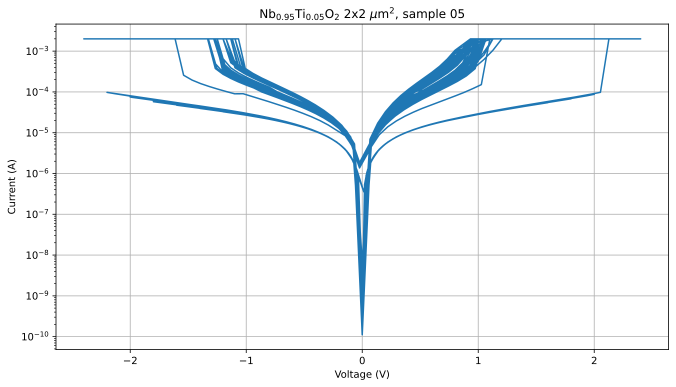

In [3]:
plt.rcParams['figure.figsize'] = (11,6)
plt.figure(0)
plt.grid()
plt.semilogy(V,I)

plt.xlabel('Voltage (V)');
plt.ylabel('Current (A)');

nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
sample = ' sample ' + sampleNumber

title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sample
plt.title(title);

In [4]:
# largestCurrent = np.amax(I)
# maxCurrentThreshhold = largestCurrent * 0.8;
# indexOfFirstLargeCurrent = np.argmax(I > maxCurrentThreshhold)

# print(indexOfFirstLargeCurrent)

# t= t[indexOfFirstLargeCurrent:]
# I= I[indexOfFirstLargeCurrent:]
# V= V[indexOfFirstLargeCurrent:]

# secondDerivativeCurrent = np.gradient(np.gradient(I))

In [5]:
# allZeroIndexes = []
# zeroIndexes = []

# allMaxIndexes = []
# maxIndexes = []

# posThreshValues = []
# negThreshValues = []
# posHoldValues = []
# negHoldValues = []

In [6]:
# def isIncreasing(L):
#     return L[0] < L[len(L) - 1]

# def isDecreasing(L):
#     return L[0] > L[len(L) - 1]

# def non_increasing(L):
#     return all(x>=y for x, y in zip(L, L[1:]))

# def non_decreasing(L):
#     return all(x<=y for x, y in zip(L, L[1:]))

# def monotonic(L):
#     return non_increasing(L) or non_decreasing(L)

# # 0 to + is thresh
# # + to 0 is hold
# # 0 to - thresh on neg
# # - to 0 hold on neg

# # this will sort runs into the piles and make all the currents positive

# def sortIntoSide(time, voltage, current, secondDerivative):
#     if isIncreasing(voltage) and isIncreasing(current):
#         current = [ abs(x) for x in current]
#         posThreshValues.append([time, voltage, current, secondDerivative])
#     elif isDecreasing(voltage) and isDecreasing(current):
#         current = [ abs(x) for x in current]
#         posHoldValues.append([time, voltage, current, secondDerivative])
#     elif isDecreasing(voltage) and isIncreasing(current):
#         current = [ abs(x) for x in current]
#         negThreshValues.append([time, voltage, current, secondDerivative])
#     elif isIncreasing(voltage) and isDecreasing(current):
#         current = [ abs(x) for x in current]
#         negHoldValues.append([time, voltage, current, secondDerivative])
#     else: 
#         print("???")

In [7]:
# # indexes of values that are pretty much 0
# zeroThreshhold = 1e-5
# for index, x in enumerate(I):
#     if x < zeroThreshhold:
#         allZeroIndexes.append(index)

# # find the zero values that begin or end a run
# zeroIndexes.append(allZeroIndexes[0])
# for x in range(len(allZeroIndexes) - 1):
#     if allZeroIndexes[x]+1 != allZeroIndexes[x+1]:
#         zeroIndexes.append(allZeroIndexes[x])
#         zeroIndexes.append(allZeroIndexes[x+1])

In [8]:
# # find all the values that hit the max
# for index, x in enumerate(I):
#     if x > maxCurrentThreshhold:
#         allMaxIndexes.append(index)

# # find the max values that start or end a run
# for x in range(len(allMaxIndexes) - 1):
#     if allMaxIndexes[x]+1 != allMaxIndexes[x+1]:
#         maxIndexes.append(allMaxIndexes[x])
#         maxIndexes.append(allMaxIndexes[x+1])

In [9]:
# # combine all zero and max indexes into one sorted array
# allIndexes = [*zeroIndexes, *maxIndexes]
# allIndexes = sorted(allIndexes)
# # print(allIndexes)
# # print()
# # runs = []
# # for x in range(0, len(allIndexes) - 3, 4):
# #     if monotonic(V[allIndexes[x]:allIndexes[x+3]]):
# #         runs.append(allIndexes[x])
# #         runs.append(allIndexes[x+1])
# #         runs.append(allIndexes[x+2])
# #         runs.append(allIndexes[x+3])
# # allIndexes = np.copy(runs)
# # print(runs, allIndexes)
# # print(runs)
# # print()
# # print(len(allIndexes) / 4)
# # print()
# # print(allIndexes[:50])
# # print()
# # print(allIndexes[0])
# # print()
# # print(allIndexes[3])
# # print()
# # print(V[allIndexes[0]:allIndexes[3]])

# # sizeOfRuns = []
# # for x in range(0, len(allIndexes) - 3, 4):
# #     sizeOfRuns.append(allIndexes[x + 3] - allIndexes[x])
# # print()
# # print(sizeOfRuns)
# # print()
# # for x in range(0, len(sizeOfRuns) - 1):
# #     if sizeOfRuns[x] * 1.5 < sizeOfRuns[x + 1]:
# #         print(x)
# # print()
# # print(len(sizeOfRuns))

In [10]:
# # loop through each run and put the V and I values into an array
# # then make an array with all the arrays
# # the indexes in the original current array is also passed
# timesToLoop = len(allIndexes) - 1
# for x in range(0, timesToLoop, 2):
#     voltageRun = []
#     currentRun = []
#     timeRun = []
#     secondDerivativeRun = []
#     start = allIndexes[x]
#     stop = allIndexes[x+1]
#     for y in range(start, stop):
#         voltageRun.append(V[y])
#         currentRun.append(I[y])
#         timeRun.append(t[y])
#         secondDerivativeRun.append(secondDerivativeCurrent[y])
    
# #     if monotonic(voltageRun):
#     sortIntoSide(timeRun, voltageRun, currentRun, secondDerivativeRun)
        

In [11]:
# # take second derivative of each current array

# posThreshValuesGradients = []
# negThreshValuesGradients = []
# posHoldValuesGradients = []
# negHoldValuesGradients = []

# for x in posThreshValues:
# #     secondDerivative = np.gradient(np.gradient(x[2], 2), 2)
#     posThreshValuesGradients.append(x[3])
# #     print(x[3])
# for x in negThreshValues:
# #     secondDerivative = np.gradient(np.gradient(x[2], 2), 2)
#     negThreshValuesGradients.append(x[3])
# for x in posHoldValues:
# #     secondDerivative = np.gradient(np.gradient(x[2], 2), 2)
#     posHoldValuesGradients.append(x[3])
# for x in negHoldValues:
# #     secondDerivative = np.gradient(np.gradient(x[2], 2), 2)
#     negHoldValuesGradients.append(x[3])
    
# # find the index of the largest value in the 2nd derivative
# posThreshValuesLargestGradient = []
# negThreshValuesLargestGradient = []
# posHoldValuesLargestGradient = []
# negHoldValuesLargestGradient = []

# for x in posThreshValuesGradients:
#     largestValue = np.argmax(np.absolute(x))
#     posThreshValuesLargestGradient.append(largestValue)
# for x in negThreshValuesGradients:
#     largestValue = np.argmax(np.absolute(x))
#     negThreshValuesLargestGradient.append(largestValue)
# for x in posHoldValuesGradients:
#     largestValue = np.argmax(np.absolute(x))
#     posHoldValuesLargestGradient.append(largestValue)
# for x in negHoldValuesGradients:
#     largestValue = np.argmax(np.absolute(x))
#     negHoldValuesLargestGradient.append(largestValue)

In [12]:
# # get the voltage when the largest second derivative happens
# posThreshValuesVoltage = []
# negThreshValuesVoltage = []
# posHoldValuesVoltage = []
# negHoldValuesVoltage = []

# for x in range(len(posThreshValuesGradients)):
#     voltage = posThreshValues[x][1][posThreshValuesLargestGradient[x]]
#     posThreshValuesVoltage.append(voltage)
# for x in range(len(negThreshValuesGradients)):
#     voltage = negThreshValues[x][1][negThreshValuesLargestGradient[x]]
#     negThreshValuesVoltage.append(voltage)
# for x in range(len(posHoldValuesGradients)):
#     voltage = posHoldValues[x][1][posHoldValuesLargestGradient[x]]
#     posHoldValuesVoltage.append(voltage)
# for x in range(len(negHoldValuesGradients)):
#     voltage = negHoldValues[x][1][negHoldValuesLargestGradient[x]]
#     negHoldValuesVoltage.append(voltage)

# print(posThreshValuesVoltage)
# print(negThreshValuesVoltage)
# print(posHoldValuesVoltage)
# print(negHoldValuesVoltage)

In [13]:
# posThreshValuesCurrent = []
# negThreshValuesCurrent = []
# posHoldValuesCurrent = []
# negHoldValuesCurrent = []

# for x in range(len(posThreshValuesGradients)):
#     current = posThreshValues[x][2][posThreshValuesLargestGradient[x]]
#     posThreshValuesCurrent.append(current)
# for x in range(len(negThreshValuesGradients)):
#     current = negThreshValues[x][2][negThreshValuesLargestGradient[x]]
#     negThreshValuesCurrent.append(current)
# for x in range(len(posHoldValuesGradients)):
#     current = posHoldValues[x][2][posHoldValuesLargestGradient[x]]
#     posHoldValuesCurrent.append(current)
# for x in range(len(negHoldValuesGradients)):
#     current = negHoldValues[x][2][negHoldValuesLargestGradient[x]]
#     negHoldValuesCurrent.append(current)

In [14]:
# def average(array):
#     return sum(array) / len(array)


# print("Positive Threshold Voltage: ", average(posThreshValuesVoltage), "Standard Deviation: ", np.std(posThreshValuesVoltage))
# print("Negative Threshold Voltage: ", average(negThreshValuesVoltage), "Standard Deviation: ", np.std(negThreshValuesVoltage))
# print("Positive Hold Voltage: ", average(posHoldValuesVoltage), "Standard Deviation: ", np.std(posHoldValuesVoltage))
# print("Negative Hold Voltage: ", average(negHoldValuesVoltage), "Standard Deviation: ", np.std(negHoldValuesVoltage))

In [15]:
#     plt.rcParams['figure.figsize'] = (11,6)
#     plt.figure(0)
#     plt.grid()
#     plt.semilogy(V, I)
#     plt.xlabel('Voltage (V)');
#     plt.ylabel('Current (A)');
#     nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
#     ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
#     sample = ' sample ' + sampleNumber
#     title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sample
    
#     plt.axhline(y=maxCurrentThreshhold, color='r', linestyle='-')
#     plt.axhline(y=zeroThreshhold, color='r', linestyle='-')

#     voltage = average(posThreshValuesVoltage)
#     current = average(posThreshValuesCurrent)
#     plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="ro")

#     voltage = average(negThreshValuesVoltage)
#     current = average(negThreshValuesCurrent)
#     plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="bo")

#     voltage = average(posHoldValuesVoltage)
#     current = average(posHoldValuesCurrent)
#     plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="go")

#     voltage = average(negHoldValuesVoltage)
#     current = average(negHoldValuesCurrent)
#     plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="yo")

#     plt.title(title);

In [16]:
#     plt.rcParams['figure.figsize'] = (11,6)
#     plt.figure(0)
#     plt.grid()
#     indexToStart = 81
#     indexToStop = 111
#     plt.semilogy(V[indexToStart:indexToStop], I[indexToStart:indexToStop])
#     plt.xlabel('Voltage (V)');
#     plt.ylabel('Current (A)');
#     nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
#     ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
#     sample = ' sample ' + sampleNumber
#     title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sample
    
#     plt.axhline(y=maxCurrentThreshhold, color='r', linestyle='-')
#     plt.axhline(y=zeroThreshhold, color='r', linestyle='-')

#     voltage = average(posThreshValuesVoltage)
#     current = average(posThreshValuesCurrent)
#     plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="ro")

#     voltage = average(negThreshValuesVoltage)
#     current = average(negThreshValuesCurrent)
#     plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="bo")

#     voltage = average(posHoldValuesVoltage)
#     current = average(posHoldValuesCurrent)
#     plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="go")

#     voltage = average(negHoldValuesVoltage)
#     current = average(negHoldValuesCurrent)
#     plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="yo")

#     plt.title(title);

In [17]:
# for x in range(0, 20, 4):
#     plt.rcParams['figure.figsize'] = (11,6)
#     plt.figure(x)
#     plt.grid()
#     plt.semilogy(V[allIndexes[x]:allIndexes[x+3]], I[allIndexes[x]:allIndexes[x+3]])
#     plt.semilogy(V[allIndexes[x]:allIndexes[x+3]], secondDerivativeCurrent[allIndexes[x]:allIndexes[x+3]])

#     print(monotonic(V[allIndexes[x]:allIndexes[x+3]]), x)
    
#     plt.xlabel('Voltage (V)');
#     plt.ylabel('Current (A)');
#     nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
#     ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
#     sample = ' sample ' + sampleNumber
#     title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sample

#     possibleThresh = [*posThreshValuesCurrent, *negThreshValuesCurrent]
#     possibleHold = [*posHoldValuesCurrent, *negHoldValuesCurrent]
    
#     plt.axhline(y=maxCurrentThreshhold, color='r', linestyle='-')
#     plt.axhline(y=zeroThreshhold, color='r', linestyle='-')
    
#     for y in possibleThresh:
#         if y in I[allIndexes[x]:allIndexes[x+3]]:
#             index = list(I).index(y)
#             plt.errorbar(V[index], I[index], xerr=0, fmt="bo", markersize=7)
    
#     for y in possibleHold:
#         if y in I[allIndexes[x]:allIndexes[x+3]]:
#             index = list(I).index(y)
#             plt.errorbar(V[index], I[index], xerr=0, fmt="ro", markersize=7)
    
#     for a in range(allIndexes[x],allIndexes[x+3]):
#         plt.errorbar(V[a], I[a], xerr=0, fmt="go", markersize=3)

#     plt.title(title);

In [18]:
    # voltage = average(posThreshValuesVoltage)
    # current = average(posThreshValuesCurrent)
    # plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="ro")

    # voltage = average(negThreshValuesVoltage)
    # current = average(negThreshValuesCurrent)
    # plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="bo")

    # voltage = average(posHoldValuesVoltage)
    # current = average(posHoldValuesCurrent)
    # plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="go")

    # voltage = average(negHoldValuesVoltage)
    # current = average(negHoldValuesCurrent)
    # plt.errorbar(voltage, current, xerr=np.std(posThreshValuesVoltage), fmt="yo")

In [19]:
# list1 = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
# list2 = [9,8,6,5,4,3,2,1, 0]
# list3 = [0, -1, -2, -3, -4, -5]
# list4 = [-9, -8, -3, -2, -1, 0]
# list5 = [-0.04 -0.08 -0.12 -0.16 -0.2  -0.24 -0.28 -0.32 -0.36 -0.4  -0.44 -0.48 -0.52 -0.56 -0.6  -0.64 -0.68 -0.72 -0.76 -0.8  -0.84 -0.88 -0.92 -0.96 -1.   -0.96 -0.92 -0.88 -0.84 -0.8  -0.76 -0.72 -0.68 -0.64 -0.6  -0.56 -0.52 -0.48 -0.44 -0.4  -0.36 -0.32 -0.28 -0.24 -0.2  -0.16 -0.12 -0.08]

# # sortIntoSide(voltage, current)
# # print(list1)
# # print(np.gradient(list1))
# # print(np.gradient(np.gradient(list1)))
# # print(monotonic(list1))
# # print(monotonic(list2))
# # print(monotonic(list5))
# # print(monotonic([-0.96, -1.0, -0.96, -0.92, -0.88 ]))
# # # non_increasing
# # print()
# # print(non_increasing([-0.96, -1.0, -0.96, -0.92, -0.88 ]))
# # print(non_increasing(list4))

# print(np.array(list5))
# # print(list5.split())

# # for i in range(0, len(list5.split())):
# #     list5.split()[i] = float(list5.split()[i])
# # print(list5)

# print ("Original list : " + str(list5))
  
# # using zip() + all()
# # to check for strictly increasing list
# res = all(i < j for i, j in zip(list5, list5[1:]))
  
# # printing result
# print ("Is list strictly increasing ? : " + str(res))


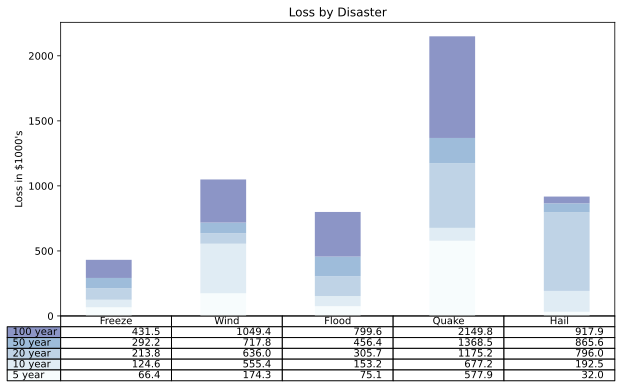

In [20]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [21]:
# # # Creating dataset
# # np.random.seed(10)

# # data_1 = np.random.normal(100, 10, 200)
# # data_2 = np.random.normal(90, 20, 200)
# # data_3 = np.random.normal(80, 30, 200)
# # data_4 = np.random.normal(70, 40, 200)
# # data = [data_1, data_2, data_3, data_4]


# # fig = plt.figure(figsize =(10, 7))
# # fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

# # ax = fig.add_subplot(111)



# # ax.set_title('axes title')
# # ax.set_ylabel('Voltage (V)')

# # # plt.xticks([1, 2, 3, 4], ['mon', 'tue', 'wed', 'thur'])
# # # xAxisLabels = ['Normal(1,1)', ' Lognormal(1,1)', 'Exp(1)', 'Gumbel(6,4)',
# # #                'Triangular(2,9,11)']
# # # xtickNames = plt.setp(ax1, xticklabels=np.repeat(randomDists, 2))
# # # plt.setp(xtickNames, rotation=45, fontsize=8)

# # ax.text(3, 2, str('unicode: Institut f\374r Festk\366rperphysik', 'latin-1'))
# # # Creating axes instance
# # ax = fig.add_axes([0, 0, 1, 1])

# # # Creating plot
# # bp = ax.boxplot(data)

# # # show plot
# # plt.show()











# fig = plt.figure(2)
# # fig.suptitle('Vthe Vhold vs size', fontsize=14, fontweight='bold')

# np.random.seed(10)

# ax = fig.add_subplot(111)
# fig.subplots_adjust(top=0.85)
# ax.set_title('$V_{th}$ & $V_{ho}$ vs Size')

# ax.set_xlabel('Size')
# ax.set_ylabel('Voltage (V)')

# sizes = ["2x2", "3x3", "4x4", "5x5", "6x6"]

# xBoxSize = 0.25
# yBoxSize = 0.125

# xTextPadding = xBoxSize / 4
# yTextPadding = yBoxSize / 4


# xBoxSizeSmall = xBoxSize / 2

# for x in range(len(sizes)): 
#     plt.text(x * xBoxSize + (xTextPadding * 3), -yBoxSize + yTextPadding, sizes[x])
#     plt.text((x * xBoxSize) + xTextPadding, -xBoxSize + yTextPadding, '$V_{th}$')
#     plt.text((x * xBoxSize) + xBoxSizeSmall + xTextPadding, -yBoxSize * 2 + yTextPadding, '$V_{ho}$')
#     ax.add_patch(Rectangle((x * xBoxSize, -yBoxSize), xBoxSize, yBoxSize, fill=False, clip_on=False))
#     ax.add_patch(Rectangle((x * xBoxSize, -xBoxSize), xBoxSizeSmall, yBoxSize, fill=False, clip_on=False))
#     ax.add_patch(Rectangle(((x * xBoxSize) + xBoxSizeSmall, -yBoxSize * 2), xBoxSizeSmall, yBoxSize, fill=False, clip_on=False))


# data_1 = np.random.normal(100, 10, 200)
# data_2 = np.random.normal(90, 20, 200)
# data_3 = np.random.normal(80, 30, 200)
# data_4 = np.random.normal(70, 40, 200)
# data = [data_1, data_2, data_3, data_4]


# # # plt.xticks([1, 2, 3, 4], ['mon', 'tue', 'wed', 'thur'])
# # # xAxisLabels = ['Normal(1,1)', ' Lognormal(1,1)', 'Exp(1)', 'Gumbel(6,4)',
# # #                'Triangular(2,9,11)']
# # # xtickNames = plt.setp(ax1, xticklabels=np.repeat(randomDists, 2))
# # # plt.setp(xtickNames, rotation=45, fontsize=8)

# # ax.text(3, 2, str('unicode: Institut f\374r Festk\366rperphysik', 'latin-1'))
# # # Creating axes instance
# ax = fig.add_axes([0, 0, 1, 1])

# # # Creating plot
# bp = ax.boxplot(data)

# # ax.axis([0, 10, 0, 10])

# plt.show()